<a href="https://colab.research.google.com/github/MercyAndati/road-accident-severity-model/blob/main/accident_suvarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
df = pd.read_csv('/content/data.csv')

# Define mappings for independent variables
day_of_week_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6,
}
# Clean and encode
df['Day_of_week'] = df['Day_of_week'].replace(day_of_week_mapping)

sex_of_driver_mapping = {
    'Male': 0,
    'Female': 1,
    'Unknown': 2,
}

df['Sex_of_driver'] = df['Sex_of_driver'].replace(sex_of_driver_mapping)

light_conditions_mapping = {
    'Daylight': 0,
    'Darkness - lights lit': 1,
    'Darkness - no lights': 2,
    'Dusk': 3,
    'Dawn': 4,
    'Darkness - no lighting':5,
    'Darkness - lights unlit':6
}

df['Light_conditions'] = df['Light_conditions'].replace(light_conditions_mapping)

driving_experience_mapping = {
    'Below 1yr': 0,
    '1-2yr': 1,
    '2-5yr': 2,
    '5-10yr': 3,
    'Above 10yr': 4,
    'No Licence': 5,
    'unknown':6,
    ' ': -1,
}

df['Driving_experience'] = df['Driving_experience'].replace(driving_experience_mapping)

road_surface_conditions_mapping = {
    'Dry': 0,
    'Wet or damp': 1,
    'Icy or snowy': 2,
    'Flooded': 3,
    'Snow':4,
    'Flood over 3cm. deep':5,
    'Unknown': -1,
}

df['Road_surface_conditions'] = df['Road_surface_conditions'].replace(road_surface_conditions_mapping)

weather_conditions_mapping = {
    'Normal': 0,
    'Raining': 1,
    'Foggy or misty': 2,
    'Snowy or icy': 3,
    'Raining and Windy':4,
    'Cloudy':5,
    'Other':6,
    'Windy':7,
    'Snow':8,
    'Fog or mist':9,
    'Unknown': -1,
}

df['Weather_conditions'] = df['Weather_conditions'].replace(weather_conditions_mapping)

accident_severity_mapping = {
    'Slight Injury': 1,
    'Serious Injury': 2,
    'Fatal injury': 3,
}

df['Accident_severity'] = df['Accident_severity'].replace(accident_severity_mapping)
# Handle missing values
df.fillna({'Driving_experience': -1,
            'Road_surface_conditions': -1,
            'Weather_conditions': -1,
            'Day_of_week': -1,
            'Sex_of_driver': -1,
            'Light_conditions': -1}, inplace=True)

df.to_csv('cleaned_data.csv', index=False)

<ipython-input-56-0ca670776464>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Day_of_week'] = df['Day_of_week'].replace(day_of_week_mapping)
<ipython-input-56-0ca670776464>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex_of_driver'] = df['Sex_of_driver'].replace(sex_of_driver_mapping)
<ipython-input-56-0ca670776464>:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to

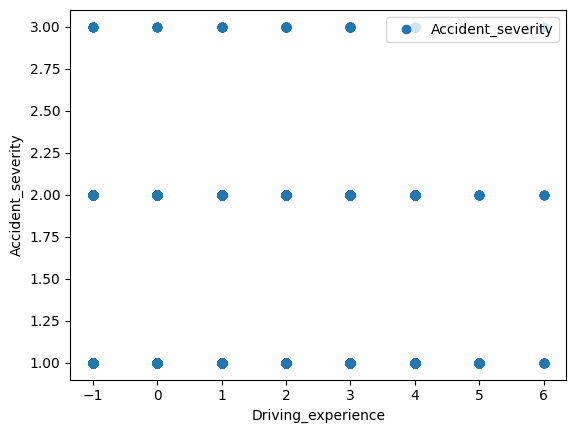

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/cleaned_data.csv')

df['Driving_experience'] = pd.to_numeric(df['Driving_experience'], errors='coerce')
df['Accident_severity'] = pd.to_numeric(df['Accident_severity'], errors='coerce')

df.plot(x='Driving_experience', y='Accident_severity', style='o')
plt.xlabel('Driving_experience')
plt.ylabel('Accident_severity')
plt.show()

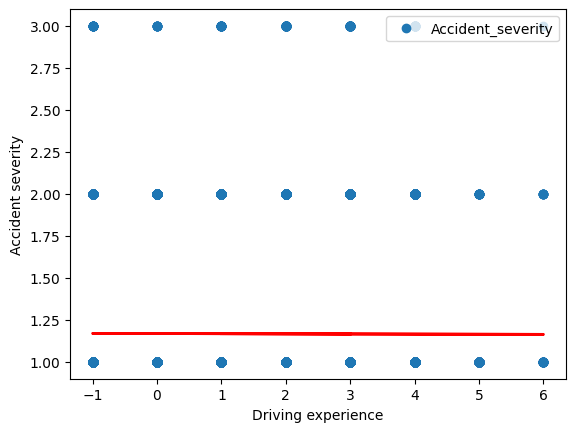

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/cleaned_data.csv')
x=df[['Driving_experience']]
y=df['Accident_severity']
regressor=LinearRegression()
regressor.fit(x,y)
df.plot(x='Driving_experience',y='Accident_severity',style='o')
plt.plot(x,regressor.predict(x),color='red',linewidth=2,label='Regressor line')
plt.xlabel('Driving experience')
plt.ylabel('Accident severity')
plt.show()

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/cleaned_data.csv')
x = pd.DataFrame(df[['Driving_experience', 'Road_surface_conditions','Weather_conditions','Light_conditions','Day_of_week']])
y=pd.DataFrame(df['Accident_severity'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9852, 5)
(2464, 5)
(9852, 1)
(2464, 1)


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/cleaned_data.csv')

independent_variables = ['Driving_experience', 'Road_surface_conditions', 'Weather_conditions','Light_conditions','Day_of_week']
x = df[independent_variables]
y = df['Accident_severity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

1.1487742435575834
[-0.00246344  0.00281465 -0.01385205  0.0271694   0.00651307]


In [58]:
y_pred=regressor.predict(x_test)
y_pred

array([1.14789699, 1.17641271, 1.15845968, ..., 1.19337062, 1.15769941,
       1.15973949])

In [59]:
y_test.head(20)

,Accident_severity
10974,1
5748,1
4941,1
11832,1
8173,1
5453,2
7491,1
3728,1
1070,2
9124,2


In [60]:
from sklearn import metrics
import numpy as np
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mae)
print('mean absolute error',mae)
print('mean squared error',mae)
print('Root mean squared error',rmse)

mean absolute error 0.2788046662370771
mean squared error 0.2788046662370771
Root mean squared error 0.5280195699375896


In [61]:
import joblib
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x,y)
joblib.dump(regressor,'linear_regression_model.plk')

['linear_regression_model.plk']

In [65]:
import joblib
import pandas as pd
import numpy as np

new_x = np.array([
    [4, 1, 3, 1, 6],
    [4, 2, 3, 1, 6],
    [5, 2, 8, 1, 5],
    [4, 1, 4, 4, 4],
    [5, 2, 5, 5, 5],
    [2, 0, 6, 6, 5],
    [1, 1, 7, 0, 6],
    [4, -1 ,8 ,1 ,2],
    [5, 1, 1, 1, 4],
    [3, -1 ,6 ,3 ,3]
])
regressor = joblib.load('linear_regression_model.plk')
predictions = regressor.predict(new_x)

rounded_predictions = np.rint(predictions)
new_data = pd.DataFrame({
    'Driving_experience': new_x[:, 0],
    'Road_surface_conditions': new_x[:, 1],
    'Weather_conditions': new_x[:, 2],
    'Light_conditions': new_x[:,3],
    'Day_of_week': new_x[:,4],
    'Predicted_accident suvarity':rounded_predictions.flatten()
})
print(new_data)

   Driving_experience  Road_surface_conditions  Weather_conditions  \
0                   4                        1                   3   
1                   4                        2                   3   
2                   5                        2                   8   
3                   4                        1                   4   
4                   5                        2                   5   
5                   2                        0                   6   
6                   1                        1                   7   
7                   4                       -1                   8   
8                   5                        1                   1   
9                   3                       -1                   6   

   Light_conditions  Day_of_week  Predicted_accident suvarity  
0                 1            6                          1.0  
1                 1            6                          1.0  
2                 1            5     

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
